In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
data_path = '/content/gdrive/My Drive/Colab Notebooks/data/'

In [0]:
import pandas as pd

In [4]:
product = pd.read_csv(data_path+'Pruduct.csv')
search1 = pd.read_csv(data_path+'Search1.csv')
search2 = pd.read_csv(data_path+'Search2.csv')
session = pd.read_csv(data_path+'Session.csv')
custom = pd.read_csv(data_path+'Custom.csv')
master = pd.read_csv(data_path+'Master.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


BigData Competiton 데이터 by 롯데 
============================
컴퓨터과학과 201413370 구건모
-------------------------------------
### 2019년 1학기 데이터 처리 프로그래밍
*****
#### 1.개요
    데이터 처리 프로그래밍 프로젝트로 어떤 데이터를 분석해야만 한다.
    Titanic 예제를 갖고 프로젝트를 진행하려 하였으나 기본 예제로 주어졌기 때문에.. 작년에 하려다가 못한 BigData Competition Dataset 으로 프로젝트를 진행해보자!!
    
#### 2. 데이터 설명
    Product : 구매된 상품명, 상품금액/건수 등 방문자의 상품구매 정보 
    Search1 : 상품을 구매한 방문자가 검색창에 입력한 검색어에 대한 검색량 
    Search2 : 분석데이터 기간 내 일별/검색어별 검색량 
    Session : 상품구매한 방문자의 세션 접속일자, 총세션시간, 세션기준 발생 지역, 기기유형 등 세션 정보 
    Custom : 방문자의 성별/연령 정보
    Master : 상품별 상품명, 대/중/소 분류명 정보
#### 3. 과정

> #####     1) 데이터 탐색
우선 주어진 데이터를 탐색해보자..

> #####     2) 데이터 클렌징
사용할 데이터들만!! 버릴거 버릴고!!

> #####     3) 데이터 분석 및 시각화
- 쇼핑몰을 사용하는 남녀간의 비율은 어떻게 될까?
- 쇼핑몰을 사용하는 사람의 연령대 비율은 어떻게 될까?
- 쇼핑몰에 접속한 사람중 몇 %의 사람이 물건을 살까?
- 나이에 따른 홈페이지 평균 접속 시간은 대략 어떻게 될까?
- customer 들의 평균 지출 값은 얼마일까?
- 사용자들중 기기별 비율이 얼마나 될까? (mobile, desktop, tablet)

1) 데이터 탐색
------------------------

In [5]:
product.head()

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT
0,4139680,7605037,12,642112,색상:워터멜론,[바비브라운],"39,000",1
1,4140076,10189797,13,570603,색상:BLK0_(BLK0)BLACK|사이즈:120 / 2개,데상트,"39,000",2
2,4142395,6158159,85,179538,(not set),[아베다],"39,000",1
3,4144914,7935714,12,554336,색상:블랙|사이즈:160cm(12~13세) / 1개,아디다스 키즈,"39,000",1
4,4144917,6406509,78,190306,5개,데코르테,"39,000",5


CLNT_ID         : 방문자의 쿠키에 랜덤으로 부여된 고유 ID <br>
SESS_ ID         :  Web/App에 접속 후 세션이 시작될 때 부여된 고유 ID <br>
HITS_SEQ        : Web/App 에서 페이지 또는 화면 클릭, 이벤트 참여, 검색 등 방문자의 행위에 대해 순서대로 배열된 일련번호<br>
PD_C                : 구매한 상품의 코드 <br>
PD_ADD_NM : 구매한 상품의 추가 정보<br>
PD_BRA_NM  : 구매한 상품의 브랜드 <br>
PD_BUY_AN   : 구매한 상품 1개의 금액 <br>
PD_BUY_CT : 구매한 상품의 수량 <br>

In [6]:
search1.head()

,CLNT_ID,SESS_ID,KWD_NM,SEARCH_CNT
0,5607714,7112876,빌리프 아이크림,6
1,5607714,4090791,프리메라 마스크팩,3
2,5607714,4090791,여성청결제,1
3,5612428,1876482,명품가방,1
4,5612428,658123,콩순이 아이스크림,1


KWD_NM : 검색창에 입력한 검색 키워드 <br>
SEARCH_CNT : 세션 내 해당 검색어 검색량 <br>


In [7]:
search2.head()

,SESS_DT,KWD_NM,SEARCH_CNT
0,20180407,닥스원피스,8
1,20180407,닥터지 브라이트닝,1
2,20180407,달팡 인트랄,2
3,20180407,대상트,1
4,20180407,더블유닷,6


SESS_DT : 세션일자 <br>
KWD_NM : 검색키워드명 <BR>
SEARCH_CNT : 검색건수 <BR>

In [8]:
custom.head()

,CLNT_ID,CLNT_GENDER,CLNT_AGE
0,4830726,F,30
1,4830874,F,40
2,4830975,F,30
3,4831275,F,30
4,4825325,F,30


CLNT_GENDER : 성별 <BR>
CLNT_AGE : 연령대

In [9]:
session.head()

,CLNT_ID,SESS_ID,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM
0,5873599,8641867,9,20180509,82.0,"1,890",mobile,Daejeon,Daejeon
1,5873599,6616320,21,20180611,105.0,"1,604",mobile,Busan,Busan
2,5873599,5886172,40,20180624,41.0,632,mobile,Daejeon,Daejeon
3,5873884,1050889,15,20180913,160.0,"1,035",mobile,Gyeonggi-do,Anyang
4,5874461,10298270,5,20180412,13.0,298,mobile,Seoul,Seoul


SESS_SEQ : Web/App 에 접속 후 세션이 시작될 때 부여된 일련번호 <BR>
TOP_PAG_VIEW_CT : 세션 내의 총 페이지(화면) 뷰 수<BR>
TOP_SESS_HR_V : 총세션시간값 : 세션 내 총 시간 <BR>
DVC_CTG_NM : 기기유형 (1: desktop, 2: mobile, 3: tablet) <br>
ZON_NM : 지역대분류 <BR>
CITY_NM : 지역중분류 <BR>


In [10]:
master.head()

,PD_C,PD_NM,CLAC1_NM,CLAC2_NM,CLAC3_NM
0,64382,언더아머 남성 UA HG 아머 모크 LS 1289559-001 - 블랙 / MD[95],스포츠패션,남성일반스포츠의류,남성스포츠티셔츠
1,62282,여자 플라워덧신 2족선물세트 17403-2set,속옷/양말/홈웨어,여성양말류,여성일반양말
2,61729,88A2933253배트맨스웨트티 - 블랙 / 130,유아동의류,유아의류상의,영유아티셔츠/탑
3,61537,"닥터마틴 아드리안 블랙, 체리레드 - 02_체리레드 / 250mm(6)",패션잡화,남성화,남성부츠
4,58820,여성 그레이 스트라이프 퍼프 소매 블라우스 (128865YQ33) - 회색(앤틱실버...,남성의류,남성의류상의,남성남방셔츠


PD_C : 상품의 코드 <BR>
PD_NM : 상품명 <BR>
CLAC1_NM : 상품 대분류명 <BR>
CLAC2_NM : 상품 중분류명 <BR>
CLAC3_NM : 상품 소분류명 <BR>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

2) 데이터 클렌징
---------------------------

In [0]:
# 사용하지 않는 column 드랍
product.drop('SESS_ID', axis =1, inplace = True)
product.drop('PD_C', axis =1, inplace = True)
product.drop('PD_ADD_NM', axis =1, inplace = True)
product.drop('PD_BRA_NM', axis =1, inplace = True)
product.drop('HITS_SEQ', axis =1, inplace=True)

In [13]:
# null 값 check
product.isnull().sum()

CLNT_ID      0
PD_BUY_AM    0
PD_BUY_CT    0
dtype: int64

In [14]:
# null 값 check
search1.isnull().sum()

CLNT_ID       0
SESS_ID       0
KWD_NM        0
SEARCH_CNT    0
dtype: int64

In [15]:
# null 값 check
search2.isnull().sum()

SESS_DT       0
KWD_NM        0
SEARCH_CNT    0
dtype: int64

In [16]:
# null 값 check
custom.isnull().sum()

CLNT_ID        0
CLNT_GENDER    0
CLNT_AGE       0
dtype: int64

In [0]:
# 사용하지 않는 column 드랍
session.drop('SESS_ID', axis = 1, inplace=True)
session.drop('SESS_SEQ', axis = 1, inplace=True)
session.drop('SESS_DT', axis = 1, inplace=True)
session.drop('TOT_PAG_VIEW_CT', axis = 1, inplace=True)
session.drop('CITY_NM', axis = 1, inplace=True)

In [18]:
# null 값 check
session.isnull().sum()

CLNT_ID              0
TOT_SESS_HR_V    14202
DVC_CTG_NM           0
ZON_NM               0
dtype: int64

In [19]:
# null 값 check
master.isnull().sum()

PD_C        0
PD_NM       0
CLAC1_NM    0
CLAC2_NM    0
CLAC3_NM    0
dtype: int64

In [0]:
# PD_BUY_AM, PD_BUY_CT, TOT_SESS_HR_V : str -> int 로 타입 변환!
product['PD_BUY_AM'] = product['PD_BUY_AM'].map(lambda x : x.replace(',','')).astype('int64')
product['PD_BUY_CT'] = product['PD_BUY_CT'].map(lambda x : x.replace(',','') if type(x) is str else x).astype('int64')
session['TOT_SESS_HR_V'] = session['TOT_SESS_HR_V'].map(lambda x: x.replace(',','') if type(x) is str else 0).astype('int64')

In [0]:
# 물품 가격 * 물품 수량 = 지불한 값
product['PD_TOTAL_AM'] = product['PD_BUY_AM'].multiply(product['PD_BUY_CT'])

In [22]:
# check
product.head()

,CLNT_ID,PD_BUY_AM,PD_BUY_CT,PD_TOTAL_AM
0,4139680,39000,1,39000
1,4140076,39000,2,78000
2,4142395,39000,1,39000
3,4144914,39000,1,39000
4,4144917,39000,5,195000


3) 데이터 분석 및 시각화
----------------------------------------

###  쇼핑몰을 사용하는 남녀간의 비율은 어떻게 될까?
### 쇼핑몰을 사용하는 사람의 연령대 비율은 어떻게 될까?

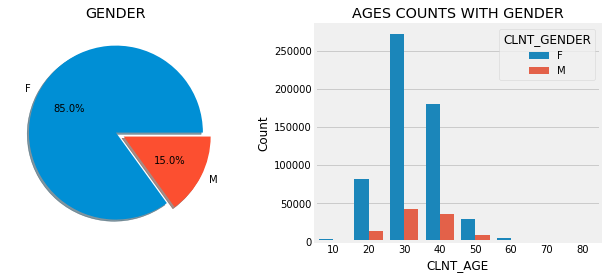

In [23]:
f, ax = plt.subplots(1,2,figsize=(10,4))
custom['CLNT_GENDER'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%',ax= ax[0], shadow=True)
ax[0].set_title('GENDER')
ax[0].set_ylabel('')
sns.countplot('CLNT_AGE', hue = 'CLNT_GENDER', data=custom, ax = ax[1])
ax[1].set_title('AGES COUNTS WITH GENDER')
ax[1].set_ylabel('Count')
plt.show()

### 쇼핑몰에 접속한 사람중 몇 % 의 사람이 물건을 살까?

In [24]:
# custome 에 등록된 사용자의 수 카운트
custom.count()

CLNT_ID        671679
CLNT_GENDER    671679
CLNT_AGE       671679
dtype: int64

In [25]:
# merge 한후 null 값이 없으므로 product 에 있는 clnt_id 는 custom 에 있는 clnt_id를 참조한다.
# merge 후 count -> 671679 로 custom.count()와 같다.
pd.merge(product,custom).groupby('CLNT_ID')['PD_TOTAL_AM'].sum().isnull().sum() # 산 사람들 정보만 있구나

0

위의 custom.count() 와 비교해 보면 산 사람들만의 정보만 있다는 것을 알 수 있다..

### 나이에 따른 홈페이지 평균 접속 시간은 대략 어떻게 될까?

In [26]:
session.dtypes

CLNT_ID           int64
TOT_SESS_HR_V     int64
DVC_CTG_NM       object
ZON_NM           object
dtype: object

In [0]:
# merge 한후 clnt_id 를 그룹으로 묶어 총 세션의 평균값을 구해준다.
temp1 = pd.merge(session, custom)[['CLNT_ID','TOT_SESS_HR_V','CLNT_AGE']].groupby(['CLNT_ID'], as_index = False).mean()
# gender 는 연산에 포함되지 않으므로 나중에 merge
temp1 = pd.merge(temp1, custom)

In [28]:
temp1.head()

,CLNT_ID,TOT_SESS_HR_V,CLNT_AGE,CLNT_GENDER
0,8,417.0,20.0,M
1,14,7098.0,30.0,F
2,32,1990.5,40.0,M
3,56,1065.0,40.0,F
4,58,3161.0,30.0,F


In [29]:
# max 와 min , mean 값을 확인
temp1.describe()

,CLNT_ID,TOT_SESS_HR_V,CLNT_AGE
count,6.716790e+05,671679.000000,671679.000000
mean,3.370591e+06,1320.774328,33.064946
std,1.942589e+06,1068.937269,8.380882
min,8.000000e+00,0.000000,10.000000
25%,1.682104e+06,574.183333,30.000000
50%,3.382071e+06,1054.000000,30.000000
75%,5.087683e+06,1747.500000,40.000000
max,6.592553e+06,18778.000000,80.000000


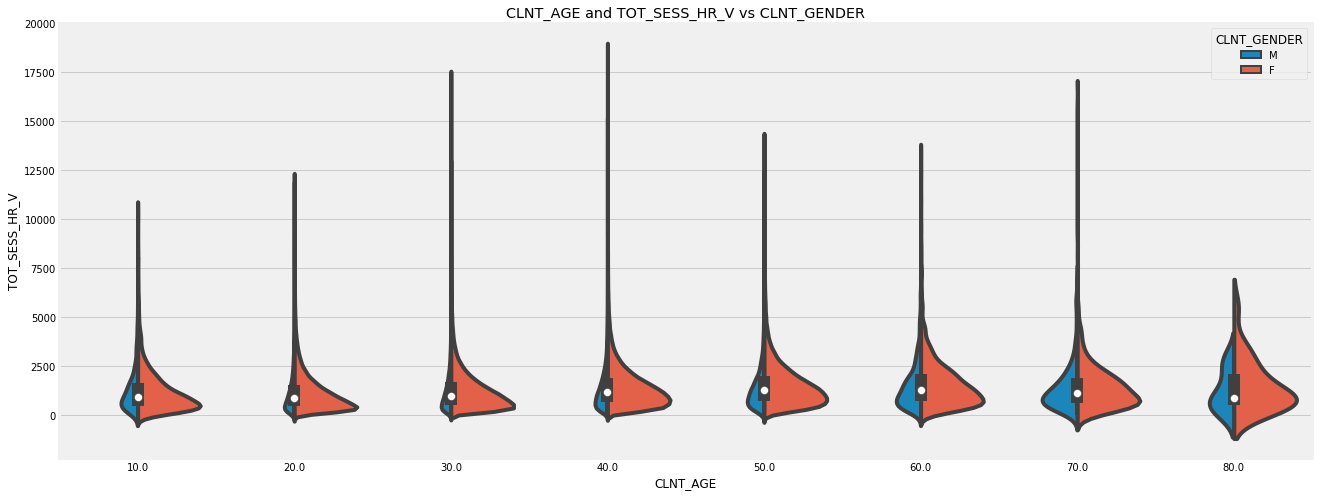

In [30]:
f, ax = plt.subplots(1,1, figsize = (20,8))
sns.violinplot("CLNT_AGE","TOT_SESS_HR_V", hue = "CLNT_GENDER", data= temp1, scale='count', split=True, ax=ax)
ax.set_title("CLNT_AGE and TOT_SESS_HR_V vs CLNT_GENDER")
plt.show()
# 분석할 당시에는 별 생각이 없었으나 지금 주석을 다는 시점에 다시 보니
# 모든 연령대마다 이상점이 있는 것 같습니다.

### customer 들의 평균 지출 값은 얼마일까?

In [0]:
temp2 = pd.merge(product,custom)

In [0]:
temp2 = temp2[['CLNT_ID','PD_TOTAL_AM','CLNT_GENDER']].groupby(['CLNT_ID'], as_index = False).sum()

In [0]:
temp2 = pd.merge(temp2,custom)

In [34]:
temp2.head()

,CLNT_ID,PD_TOTAL_AM,CLNT_GENDER,CLNT_AGE
0,8,76000,M,20
1,14,69800,F,30
2,32,76800,M,40
3,56,23800,F,40
4,58,131100,F,30


In [35]:
temp2.describe() # 4억..?

,CLNT_ID,PD_TOTAL_AM,CLNT_AGE
count,6.716790e+05,6.716790e+05,671679.000000
mean,3.370591e+06,3.143598e+05,33.064946
std,1.942589e+06,1.092811e+06,8.380882
min,8.000000e+00,1.000000e+02,10.000000
25%,1.682104e+06,6.980000e+04,30.000000
50%,3.382071e+06,1.397000e+05,30.000000
75%,5.087683e+06,3.090000e+05,40.000000
max,6.592553e+06,4.673702e+08,80.000000


In [0]:
temp2.loc[(0<=temp2.PD_TOTAL_AM)&(temp2.PD_TOTAL_AM <= 100000),'PD_TOTAL_AM'] = 100000
temp2.loc[(100000<temp2.PD_TOTAL_AM)&(temp2.PD_TOTAL_AM <= 200000),'PD_TOTAL_AM'] = 200000
temp2.loc[(200000<temp2.PD_TOTAL_AM)&(temp2.PD_TOTAL_AM <= 300000),'PD_TOTAL_AM'] = 300000
temp2.loc[(300000<temp2.PD_TOTAL_AM)&(temp2.PD_TOTAL_AM <= 400000),'PD_TOTAL_AM'] = 400000
temp2.loc[(temp2.PD_TOTAL_AM > 400000),'PD_TOTAL_AM'] = 400001
# 경우의 수가 너무 많으니 적절하게 묶어줍니다.

In [0]:
dicts = {
    100000 : '0\n ~\n 100000',
    200000 : '100001\n ~\n 200000',
    300000 : '200001\n ~\n 300000',
    400000 : '300001\n ~\n 400000',
    400001 : '400001\n ~\n MAX'
}

In [0]:
temp2['PD_TOTAL_AM'] = temp2['PD_TOTAL_AM'].map(lambda x : dicts[x])
# int -> str 으로 변환합니다.

In [39]:
temp2.head()

,CLNT_ID,PD_TOTAL_AM,CLNT_GENDER,CLNT_AGE
0,8,0\n ~\n 100000,M,20
1,14,0\n ~\n 100000,F,30
2,32,0\n ~\n 100000,M,40
3,56,0\n ~\n 100000,F,40
4,58,100001\n ~\n 200000,F,30


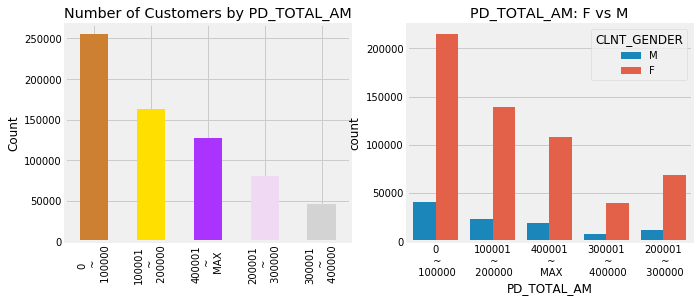

In [40]:
f, ax = plt.subplots(1,2, figsize = (10,4))
temp2['PD_TOTAL_AM'].value_counts().plot.bar(color=['#cd7f32','#ffdf00','#aa33ff','#f0daf3','#d3d3d3'], ax = ax[0])
ax[0].set_title('Number of Customers by PD_TOTAL_AM')
ax[0].set_ylabel('Count')
sns.countplot('PD_TOTAL_AM', hue = 'CLNT_GENDER', data = temp2, ax = ax[1])
ax[1].set_title('PD_TOTAL_AM: F vs M')
plt.show()
# ~ 100000 : 0 ~ 100000 원 사이
# 

### 사용자들중 기기별 비율이 얼마나 될까? (mobile, desktop, tablet)

In [41]:
session.head()

,CLNT_ID,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM
0,5873599,1890,mobile,Daejeon
1,5873599,1604,mobile,Busan
2,5873599,632,mobile,Daejeon
3,5873884,1035,mobile,Gyeonggi-do
4,5874461,298,mobile,Seoul


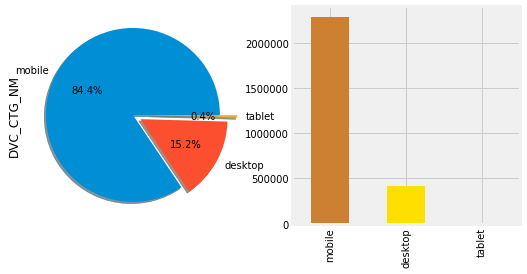

In [42]:
f, ax = plt.subplots(1,2, figsize = (8,4))
session['DVC_CTG_NM'].value_counts().plot.pie(explode=[0,0.1,0.2], autopct = '%1.1f%%', ax = ax[0], shadow = True)
session['DVC_CTG_NM'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'] , ax = ax[1])
# mobile사용자가 desktop사용자 보다 높다는 소리는 들었으나 이렇게 높을 줄 몰랐습니다. 

#### 4. 끝마침
> 제 실력에 맞지 않는 Dataset 으로 한 감이 없지 않아 있습니다. 
<br>하고 싶은 것은 더 많았으나 pandas 에 익숙하지 않아 코딩이 잘 되지 않았습니다.<br>
이수안 교수님 한 학기동안 고생 많으셨습니다.
